## Calculate surface-forced watermass transformation
Presently, information about the products, e.g. names of variables is hard-coded. Could improve robustness by specifying generic names.

In [1]:
%load_ext autoreload
%autoreload 2
from dask.diagnostics import ProgressBar
import so_decadal_variability as so
import numpy as np
import xarray as xr
import os

In [2]:
fluxname='era5'
oceanname='iap'
timeslice = slice('1980','2018')
dg = 0.1
gn_edges = np.arange(1026,1028.5,dg)
save = False
ds = so.process.loaddata(fluxname,oceanname,timeslice)
ds, xgrid = so.grid.get_xgcm(ds)

# Hack to get around grid errors in IAP for now
# if oceanname=='iap':
#     ds['vol4d'] = ds['dx']*ds['dy']*ds['dz']*xr.ones_like(ds['vol4d'])

b_cap = False
cap = 5
if b_cap:
    condition = (ds['b']>cap) & (~np.isnan(ds['b']))
    ds['b'] = ds['b'].where(~condition,cap)
    
G = so.wmt.calc_watermasstransformation(ds,xgrid,gn_edges,b_ones=False)
if save:
    with ProgressBar():
        localdir = '../data/processed/'+fluxname+'_'+oceanname
        if ~os.path.isdir(localdir):
            !mkdir $localdir
        filename = 'G_'+str(dg)+'.nc'
        G.to_netcdf(localdir+'/'+filename)

In [3]:
with ProgressBar():
    G.load()

[###############                         ] | 37% Completed | 18.1s

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed | 41.1s


In [4]:
# # SEVERE hack to solve NaN issue (caused by NaNs in the gamman field)
# if oceanname=='iap':
#     val = G['gamman_bin'].sel(gamman_bin=1027.75,method='nearest')
#     G['heat'].loc[dict(time='2002-10-01',gamman_bin=val)]=2E10
#     G['total'].loc[dict(time='2002-10-01',gamman_bin=val)]=G['heat'].loc[dict(time='2002-10-01',gamman_bin=val)]+G['fw'].loc[dict(time='2002-10-01',gamman_bin=val)]

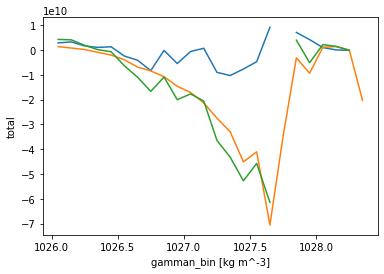

In [6]:
G['heat'].mean('time').plot()
G['fw'].mean('time').plot()
G['total'].mean('time').plot()

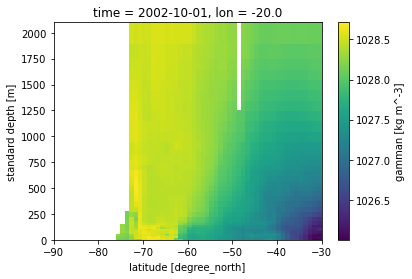

In [10]:
ds['gamman'].sel(lon=-20,time='2002-10-01',method='nearest').plot()